# **Supermarket Sales Analysis(EDA and Regression)**

In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd/gdrive/My Drive/Supermarket sales_EDA/

/gdrive/My Drive/Supermarket sales_EDA


In [4]:
ls

Stores.csv


**Importing Packages**

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

**Import of the CSV file**

In [6]:
df=pd.read_csv("/gdrive/My Drive/Supermarket sales_EDA/Stores.csv")

**Top 5 rows of the data**

In [7]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


**Finding out the number of empty cells in the dataset**

In [9]:
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

There exists no empty cells in the dataset

**Descriptive Statistics of the Dataset**

In [10]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


**Finding out the range of the Store Sales**

In [11]:
rng=df['Store_Sales'].max()-df['Store_Sales'].min()
rng

101400

**Conducting z test to find out outliers**

We have assumed the data to be normal and to prove its normality, we are conducting the z test

In [12]:
x=df["Store_Sales"]
mean=df["Store_Sales"].mean()
std=df["Store_Sales"].std()
z= (x-mean)/std
z

0      0.415264
1     -1.136153
2     -0.310708
3     -0.326996
4     -0.740591
         ...   
891    0.409447
892    1.322147
893    0.994064
894    2.167370
895   -0.291512
Name: Store_Sales, Length: 896, dtype: float64

**Adding the z values to the dataset**

In [13]:
df["z-score"]=z

In [14]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,z-score
0,1,1659,1961,530,66490,0.415264
1,2,1461,1752,210,39820,-1.136153
2,3,1340,1609,720,54010,-0.310708
3,4,1451,1748,620,53730,-0.326996
4,5,1770,2111,450,46620,-0.740591


**Plotting the z values**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


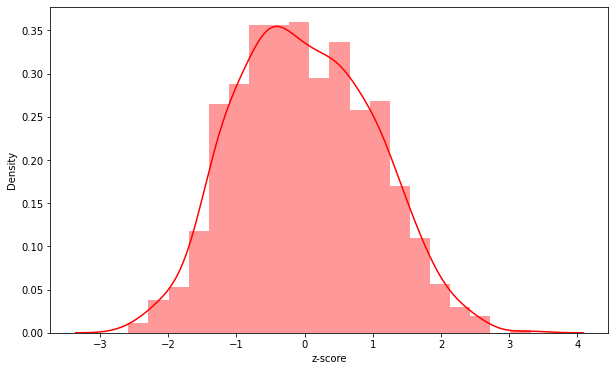

In [15]:
ax=plt.figure(figsize=(10,6))
sb.distplot(df['z-score'],color="red")

There are certain values present outside the threshold of 99.7%

**Outlier in the Dataset is**

In [16]:
outl=df[df["z-score"]>3]
outl

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,z-score
649,650,1989,2414,860,116320,3.313917


**Scatterplot of the Dataset**

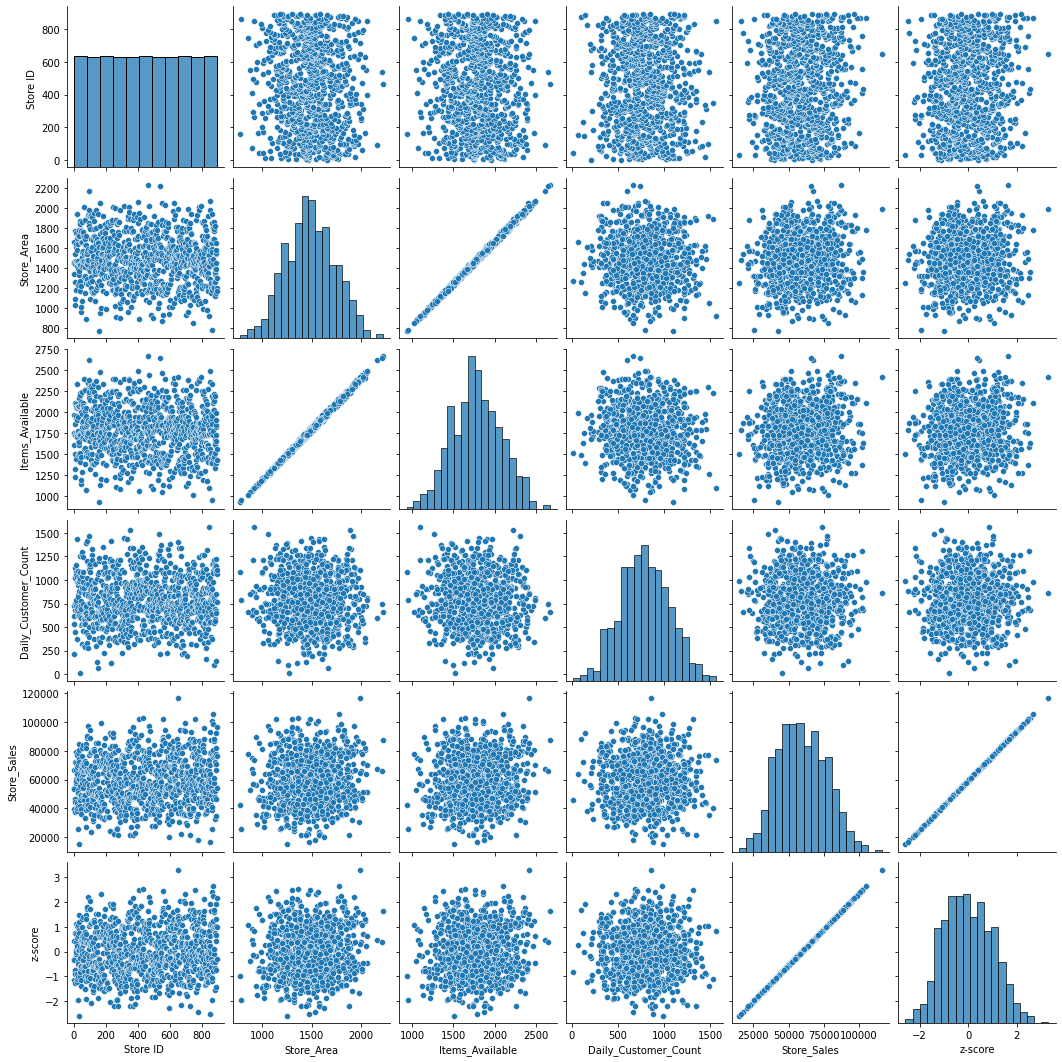

In [17]:
sb.pairplot(df,palette='Paired')

**Density curve showing the frequency of number of items present in each store**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


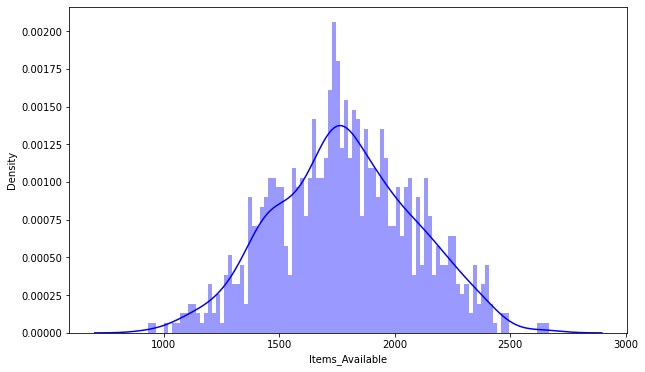

In [18]:
ax=plt.figure(figsize=(10,6))
sb.distplot(df["Items_Available"],color="blue",bins=100)

**Scatterplot between the Store Area and Items Available**

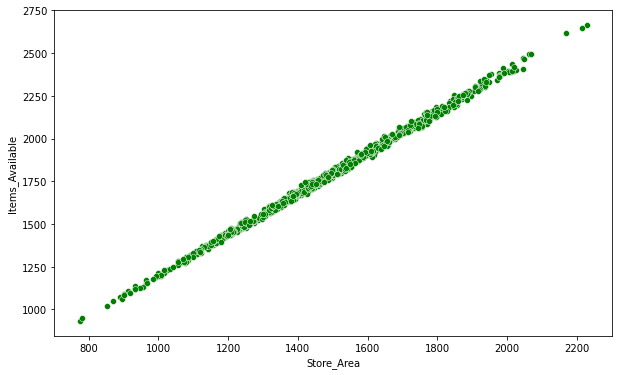

In [19]:
ax=plt.figure(figsize=(10,6))
sb.scatterplot(x='Store_Area',y='Items_Available',data=df,color="green")

**Scatterplot between the Store Sales and Items Available**

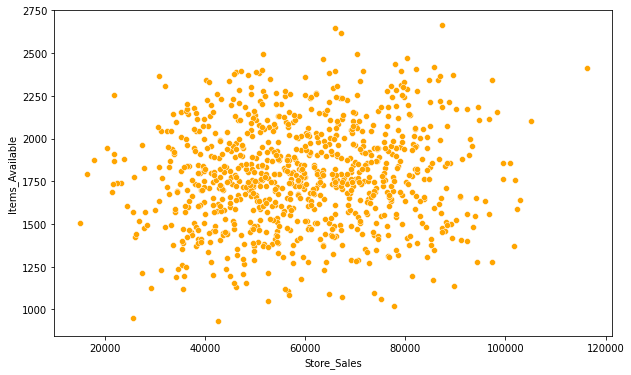

In [20]:
ax=plt.figure(figsize=(10,6))
sb.scatterplot(x='Store_Sales',y='Items_Available',data=df,color="orange")

**Scatterplot between the Store Sales and Store Area**

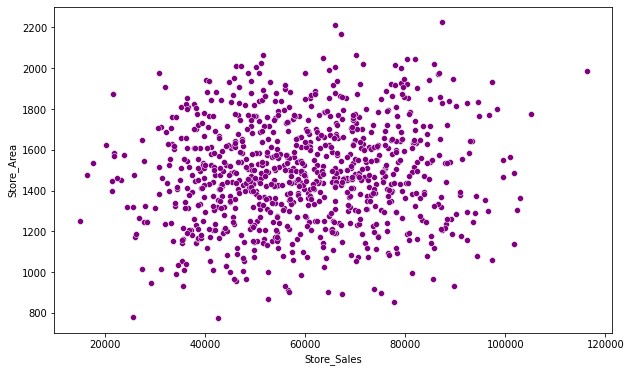

In [21]:
ax=plt.figure(figsize=(10,6))
sb.scatterplot(x='Store_Sales',y='Store_Area',data=df,color="purple")

**Scatterplot between the Store Sales and Daily Customer Count**

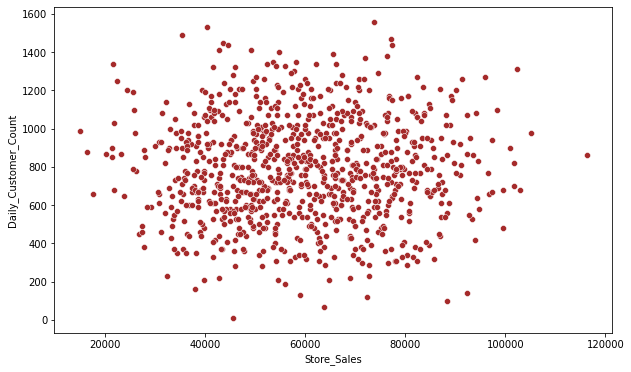

In [22]:
ax=plt.figure(figsize=(10,6))
sb.scatterplot(x='Store_Sales',y='Daily_Customer_Count',data=df,color="brown")

**Correlation of the different variables**

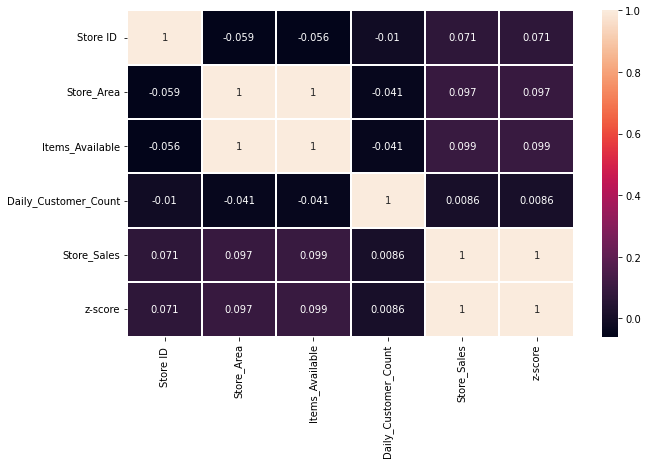

In [23]:
ax=plt.figure(figsize=(10,6))
corr=df.corr()
sb.heatmap(corr,linewidths=1,linecolor='white',annot=True)

Shows Store Area correlated to Items Available

# Model 1:

**Assigning the independant and depenant variables as X and y respectively**

In [24]:
X=df[["Daily_Customer_Count"]]
y=df[["Store_Sales"]]

**Importing Train Test Split**

In [25]:
from sklearn.model_selection import train_test_split

**Assigning test size to 20%**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Importing Linear Regression**

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr=LinearRegression()

**Fitting the data in the model**

In [29]:
lr.fit(X_train,y_train)

LinearRegression()

**The Intercept of the data**

In [30]:
intercept=lr.intercept_
intercept

array([59900.61346603])

**Coefficient of the data**

In [31]:
coef=lr.coef_[0]
coef

array([-0.92995614])

**Predicting the data**

In [32]:
pred = lr.predict(X_test)

**Plotting the testing and the predicted data**

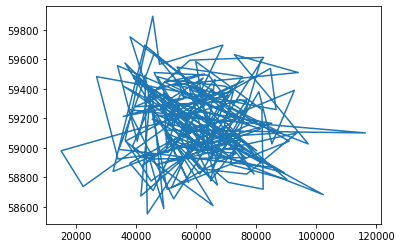

In [33]:
plt.plot(y_test, pred)

There looks no explanation or fitting through the model

**Finding the R squared value to find out how well the model is explained**

In [34]:
from sklearn.metrics import r2_score
r2=(r2_score(y_test,pred))
print(r2*100)

-0.6291680857297921


The model looks very undexplained maybe due to underfitting

**Absolute Error in the data**

In [35]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(y_test, pred)
error

13318.772007845078

The model has a high error making it a failed model

# **Model 2**

**Assigning the independant and dependant variables**

In [36]:
X1=df[["Store_Area"]]
y1=df[["Items_Available"]]

In [37]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [38]:
lr1 = LinearRegression()

**Fitting the new model into linear regression**

In [39]:
lr1.fit(X1_train,y1_train)

LinearRegression()

**Intercept of the model**

In [40]:
intercept1=lr1.intercept_
intercept1

array([5.28213962])

**Coefficient of the model**

In [41]:
coef1=lr1.coef_[0]
coef1

array([1.1960332])

In [42]:
pred1 = lr1.predict(X1_test)

**Plotting the test and predicted data**

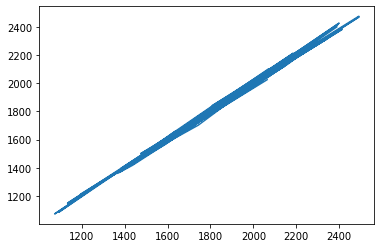

In [43]:
plt.plot(y1_test, pred1)

There seems to be relation between tested and predicted data

**Finding out the R squared data**

In [44]:
from sklearn.metrics import r2_score
r2_1=(r2_score(y1_test,pred1))
print(r2_1*100)

99.75369279818469


The model is able to explain 99% of the data

**Absolute error in the data**

In [45]:
from sklearn.metrics import mean_absolute_error
error1 = mean_absolute_error(y1_test, pred1)
error1

11.944631101516526

The data has low error

**Conclusion**
* Model 2 is well explained and thus the model stands
* the Model is 99% explained
* Thus we find that an increase in Store Area leads to increase in Items Available and vice versa